In [1]:

import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

In [9]:

df.columns


Index(['v1', 'v2'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['v1']=le.fit_transform(df['v1'])
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [11]:
df.v1.value_counts()


0    4825
1     747
Name: v1, dtype: int64

In [12]:

df.duplicated().sum()


403

In [13]:

df=df.drop_duplicates()
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
non_spam=df[df['v1']==0]
non_spam


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:

spam=df[df['v1']==1]
spam


,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:

non_spam.describe()


,v1
count,4516.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [17]:
non_spam.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4516 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      4516 non-null   int64 
 1   v2      4516 non-null   object
dtypes: int64(1), object(1)
memory usage: 105.8+ KB


In [18]:
spam.describe()

,v1
count,653.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [19]:
spam.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 2 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      653 non-null    int64 
 1   v2      653 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


In [20]:

df1=pd.concat([non_spam,spam],axis=0)
df1

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [21]:
df1.describe()

,v1
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [23]:

df1.isnull().sum()


v1    0
v2    0
dtype: int64

In [24]:

non_spamm = df1[df1['v1']==1]
non_spamm

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [25]:

spamm = df1[df1['v1']==0]
spamm

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [26]:
not_spam_txt = " ".join(non_spamm['v2'])
len(not_spam_txt)

90695

In [27]:
spam_txt = " ".join(spamm['v2'])
len(spam_txt)

322709

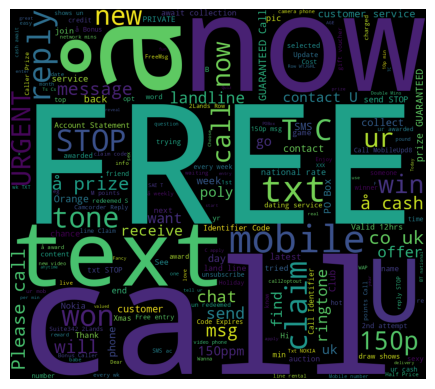

In [28]:
wc = WordCloud(width=900,height=800).generate(not_spam_txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

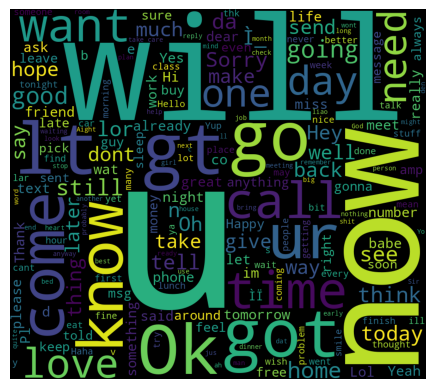

In [29]:
wc1 = WordCloud(width = 900,height = 800).generate(spam_txt)
plt.imshow(wc1)
plt.axis('off')
plt.show()

In [30]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df1['v2'],df1['v1'],test_size=0.2,random_state=42,stratify=df1['v1'])

In [31]:

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((4135,), (4135,), (1034,), (1034,))

In [32]:

import spacy
NLP = spacy.load("en_core_web_sm")
NLP


In [33]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in NLP(txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])

In [35]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x7d94cd3ce8c0>)),
                ('text classifier', RandomForestClassifier())])

In [36]:

ypred = model.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [37]:

ypred[:100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [38]:

from sklearn.metrics import classification_report as cr
print(cr(ytest,ypred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       903
           1       0.96      0.87      0.91       131

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [39]:
sample_txt = 'Congratulations! You’ve won a $500 Amazon gift card. Claim it here'

In [40]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in NLP(sample_txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])


In [41]:

model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['!', '$', '.', '500', 'Amazon', 'card', 'claim', 'congratulation', 'gift', 'win', '’ve'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x7d94cd47f250>)),
                ('text classifier', RandomForestClassifier())])

In [42]:
print(ypred[0])

0
